## Манипулирование данными

Невозможно что-либо сделать, если мы не умеем манипулировать данными. Две основные операции, которые нам нужно сделать с данными - (i) получить их и (ii) обработать. Нет смысла собирать данные, если мы даже не знаем, как их хранить, поэтому давайте сначала поработаем с синтетическими данными. Мы начнем с torch.tensor. Это основной инструмент для хранения и преобразования данных в torch. Если вы раньше работали с NumPy, вы заметите, что он по своей конструкции очень похож на многомерный массив NumPy. Тем не менее, он даёт несколько ключевых преимуществ. Во-первых, torch.tensor поддерживает асинхронные вычисления на CPU и GPU. Во-вторых, он обеспечивает поддержку автоматического дифференцирования.

Начнем с импорта torch

In [82]:
import torch

Tensor - есть массив (возможно, многомерный) числовых значений. tensor с одной осью называется (в математике) вектором, с двумя - матрицей. Для массивов с более чем двумя осями нет специальных имен - их называют просто тензорами.
Самый простой объект, который мы можем создать - это вектор. Для начала мы можем использовать arange для создания вектора строки с 12 последовательными целыми числами.

In [83]:
x = torch.arange(12)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

Мы можем получить форму экземпляра tensor через свойство shape.

In [84]:
x.shape

torch.Size([12])

Узнать расположен ли он на gpu или cpu можно через специальный аттрибут - device

In [85]:
x.device

device(type='cpu')

Мы используем функцию view, чтобы изменить форму одного (возможно многомерного) массива на другой, который содержит такое же количество элементов. Например, мы можем преобразовать форму нашего векторного вектора x в (3, 4), который содержит те же значения, но интерпретирует их как матрицу, содержащую 3 строки и 4 столбца. Обратите внимание, что, хотя форма изменилась, элементы в x не изменились. Причем количество элементов осталось прежним.

In [86]:
x.view((3,4))

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

Указывать каждое измерение вручную достаточно утомительно. К счастью, torch может автоматически выводить одно измерение, учитывая другие. Мы можем указать -1 для измерения, которое мы хотели бы, чтобы torch автоматически выводил. В нашем случае вместо x.view((3, 4)) мы могли бы использовать x.view ((- 1, 4)) или x.view((3, -1)).

In [87]:
x.view((-1, 4))

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

Другие две полезные функции - zeros и ones. Они создают массивы из всех нулей и всех единиц. Они принимают форму создаваемого тензора в качестве параметра

In [88]:
torch.zeros((2,3,4))

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [89]:
torch.ones((2,3,4))

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

Конечно же, можно создать тензор явно указав все значения

In [90]:
torch.tensor([[1,2,3], [4,5,6]])

tensor([[1, 2, 3],
        [4, 5, 6]])

Иногда бывает полезно создать массив, заполненный случайными значениями. Для этого используются функции torch.rand и torch.randn. Первое использовает равномерное распределение, второе - нормальное

In [91]:
torch.rand((2,3,4))

tensor([[[0.3189, 0.1380, 0.3153, 0.4616],
         [0.2516, 0.4563, 0.1723, 0.7259],
         [0.0428, 0.4369, 0.1863, 0.8106]],

        [[0.2140, 0.3459, 0.7567, 0.0649],
         [0.6593, 0.5239, 0.2105, 0.6640],
         [0.0169, 0.0480, 0.3377, 0.0291]]])

In [92]:
torch.randn((2,3,4))

tensor([[[-0.6450,  0.4737, -3.1560, -1.6475],
         [-1.8917, -1.5835, -0.3348,  1.1734],
         [-1.1775,  0.6614, -1.2232, -0.5756]],

        [[-0.6820,  0.9216, -0.6767, -0.4020],
         [ 0.3596,  1.3020,  0.6201,  0.3146],
         [-0.7058, -1.2298,  1.0453,  0.0835]]])

## Операции

Обычно мы хотим не только создавать массивы, но и применять к ним функции. Самые простые и полезные из них - это поэлементные функции. Они работают, выполняя одну скалярную операцию над соответствующими элементами двух массивов. 

In [93]:
x = torch.tensor([1., 2., 4., 8.])
y = torch.ones_like(x) * 2
print('x =', x)
print('y =', y)
print('x + y', x + y)
print('x - y', x - y)
print('x * y', x * y)
print('x / y', x / y)

x = tensor([1., 2., 4., 8.])
y = tensor([2., 2., 2., 2.])
x + y tensor([ 3.,  4.,  6., 10.])
x - y tensor([-1.,  0.,  2.,  6.])
x * y tensor([ 2.,  4.,  8., 16.])
x / y tensor([0.5000, 1.0000, 2.0000, 4.0000])


Еще больше операций может быть выполненно поэлементно. Например - операции exp

In [94]:
x.exp()

tensor([2.7183e+00, 7.3891e+00, 5.4598e+01, 2.9810e+03])

В дополнение к поэлементным вычислениям, мы также можем выполнять матричные операции. Например, матричное умножение. Для этого используется функция mm.

In [95]:
x = torch.arange(12).reshape((3,4))
y = torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.mm(x, y.T)

tensor([[ 18,  20,  10],
        [ 58,  60,  50],
        [ 98, 100,  90]])

Мы также можем объединить несколько тензоров. Для этого нам нужно указать, по какому измерению производить объединение. В приведенном ниже примере объединяются две матрицы по измерению 0 (по строкам) и измерению 1 (по столбцам) соответственно.

In [96]:
torch.cat((x, y), dim=0)

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [ 2,  1,  4,  3],
        [ 1,  2,  3,  4],
        [ 4,  3,  2,  1]])

In [97]:
torch.cat((x, y), dim=1)

tensor([[ 0,  1,  2,  3,  2,  1,  4,  3],
        [ 4,  5,  6,  7,  1,  2,  3,  4],
        [ 8,  9, 10, 11,  4,  3,  2,  1]])

Для получения булевых тензоров можно использовать булевы операторы. Например, можно сравнить два тензора при помощи оператора ==

In [98]:
x == y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

Суммирование всех элементов тезора дает тензор с одним элементом.

In [99]:
x.sum()

tensor(66)

Мы можем преобразовать результат в скаляр в Python, используя функцию item

In [100]:
x.sum().item()

66

## Broadcast 

Выполнять операции можно не только с тензорами одинакового размера, но и разного. Когда их формы различаются, запускается механизм broadcast'а: Сначала элементы копируются соответствующим образом, чтобы два тензора имели одинаковую форму, а затем операции выполняются поэлементно.

In [101]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1, 2))
a, b

(tensor([[0],
         [1],
         [2]]), tensor([[0, 1]]))

Поскольку a и b являются матрицами (3x1) и (1x2) соответственно, их формы не совпадают. Torch решает эту проблему путем broadcast'а значений обеих матриц в большую (3x2) матрицу следующим образом: для матрицы a он реплицирует столбцы, для матрицы b он реплицирует строки. После чего запускается операция сложения

In [102]:
a + b

tensor([[0, 1],
        [1, 2],
        [2, 3]])

## Индексирование

Как и в любом другом массиве Python, элементы в тензоре могут быть доступны по их индексу. По традиции первый элемент имеет индекс 0, а диапазоны указываются для включения первого, но не последнего элемента. По этой логике `1: 3` выбирает второй и третий элемент из тензора

In [103]:
x

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [104]:
x[1:3]

tensor([[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

Мы так же можем изменять значения в тензоре

In [105]:
x[1, 2] = 9
x

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  9,  7],
        [ 8,  9, 10, 11]])

Если мы хотим присвоить нескольким элементам одно и то же значение, мы просто индексируем все из них (при помощи оператора `:`), а затем присваиваем им значение. Например, `[0:2,:]` обращается к первой и второй строчкам.

In [106]:
x[0:2, :] = 12
x

tensor([[12, 12, 12, 12],
        [12, 12, 12, 12],
        [ 8,  9, 10, 11]])

## В numpy и назад

In [107]:
x.numpy()

array([[12, 12, 12, 12],
       [12, 12, 12, 12],
       [ 8,  9, 10, 11]])

In [108]:
y = torch.tensor(x.numpy())
y

tensor([[12, 12, 12, 12],
        [12, 12, 12, 12],
        [ 8,  9, 10, 11]])

## Немного практики

1. Матрица B называется обратной к матрице A, если A*B = I (где I - единичная матрица). Найдите (перебором) обратную к матрице A = ((1,1), (1,2))
2. Примениете оператор преобразования A = ((1,2), (3,4)) к квадрату с вершинами в точка (1,1), (1,-1), (-1, -1), (-1, 1) и найдите расстояния между получившимся вершинами

In [140]:
a = torch.tensor([[1,1], [1,2]])
b = torch.tensor([[2, -1], [-1, 1]])
torch.mm(a, b)        

tensor([[1, 0],
        [0, 1]])

In [141]:
b

tensor([[ 2, -1],
        [-1,  1]])

In [142]:
verteces = [[1.,1.], [1.,-1.], [-1., -1.], [-1., 1.]]
vt = [torch.tensor(v) for v in verteces]
op = torch.tensor([[1.,2.], [3.,4.]])

In [143]:
transformed = [torch.mv(op, t) for t in vt]

In [144]:
for i in range(-1, 3):
    v1 = vt[i]
    v2 = vt[i + 1]
    distance = torch.sqrt(((v1 - v2)**2).sum())
    print("Distance between {} and {} was {:.3f}".format(v1, v2, distance.item()))
    
    v1 = transformed[i]
    v2 = transformed[i + 1]
    distance = torch.sqrt(((v1 - v2)**2).sum())
    print("Distance between {} and {} now {:.3f}".format(v1, v2, distance.item()))

Distance between tensor([-1.,  1.]) and tensor([1., 1.]) was 2.000
Distance between tensor([1., 1.]) and tensor([3., 7.]) now 6.325
Distance between tensor([1., 1.]) and tensor([ 1., -1.]) was 2.000
Distance between tensor([3., 7.]) and tensor([-1., -1.]) now 8.944
Distance between tensor([ 1., -1.]) and tensor([-1., -1.]) was 2.000
Distance between tensor([-1., -1.]) and tensor([-3., -7.]) now 6.325
Distance between tensor([-1., -1.]) and tensor([-1.,  1.]) was 2.000
Distance between tensor([-3., -7.]) and tensor([1., 1.]) now 8.944


## Вероятности

In [32]:
# Равномерное распределение вероятности

In [145]:
torch.rand(10)

tensor([0.6737, 0.2510, 0.0436, 0.8806, 0.8414, 0.2155, 0.7819, 0.9293, 0.9413,
        0.4566])

In [35]:
## Нормальное распределение

In [146]:
torch.randn(10)

tensor([-0.9420, -0.1692, -0.6964,  0.2431, -0.1955, -1.5139, -0.6033, -0.9355,
        -0.0650,  0.6315])

In [37]:
## Равномерное на целых числах

In [147]:
torch.randint(0, 10, (10,))

tensor([1, 6, 7, 8, 6, 2, 7, 6, 1, 6])

## Постройте график плотности для нормального распределения

In [148]:
import matplotlib.pyplot as plt
%matplotlib inline

In [151]:
data = torch.randn(10000)

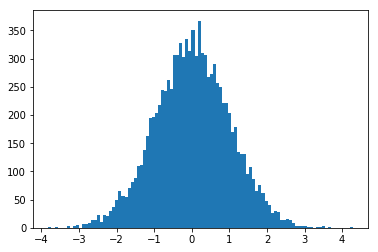

In [152]:
plt.hist(data, bins=100)
plt.show()

## Теорема Баеса

In [153]:
import torchvision

In [154]:
def transform(data):
    data = torch.tensor(data.getdata(), dtype=torch.float32)
    return torch.floor(data / 128.).squeeze(axis=-1)

In [155]:
mnist_train = torchvision.datasets.MNIST('.', train=True, transform=transform, download=True)
mnist_test  = torchvision.datasets.MNIST('.', train=False, transform=transform, download=True)

In [156]:
mnist_train[0]

(tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
         1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
         0., 0., 0., 0., 0.,

In [159]:
mnist_train[10][0].shape

torch.Size([784])

In [161]:
mnist_train[10][1]

3

In [162]:
import matplotlib.pyplot as plt
%matplotlib inline

In [163]:
mnist_train[0][0]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 

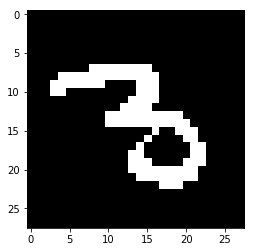

In [166]:
plt.imshow(mnist_train[30][0].reshape(28, 28), cmap='gray', vmin=0, vmax=1)

## ДЗ - реализуйте сами (без использования SKLEARN) наивный баесовский классификатор для этой задачи 1 от 2